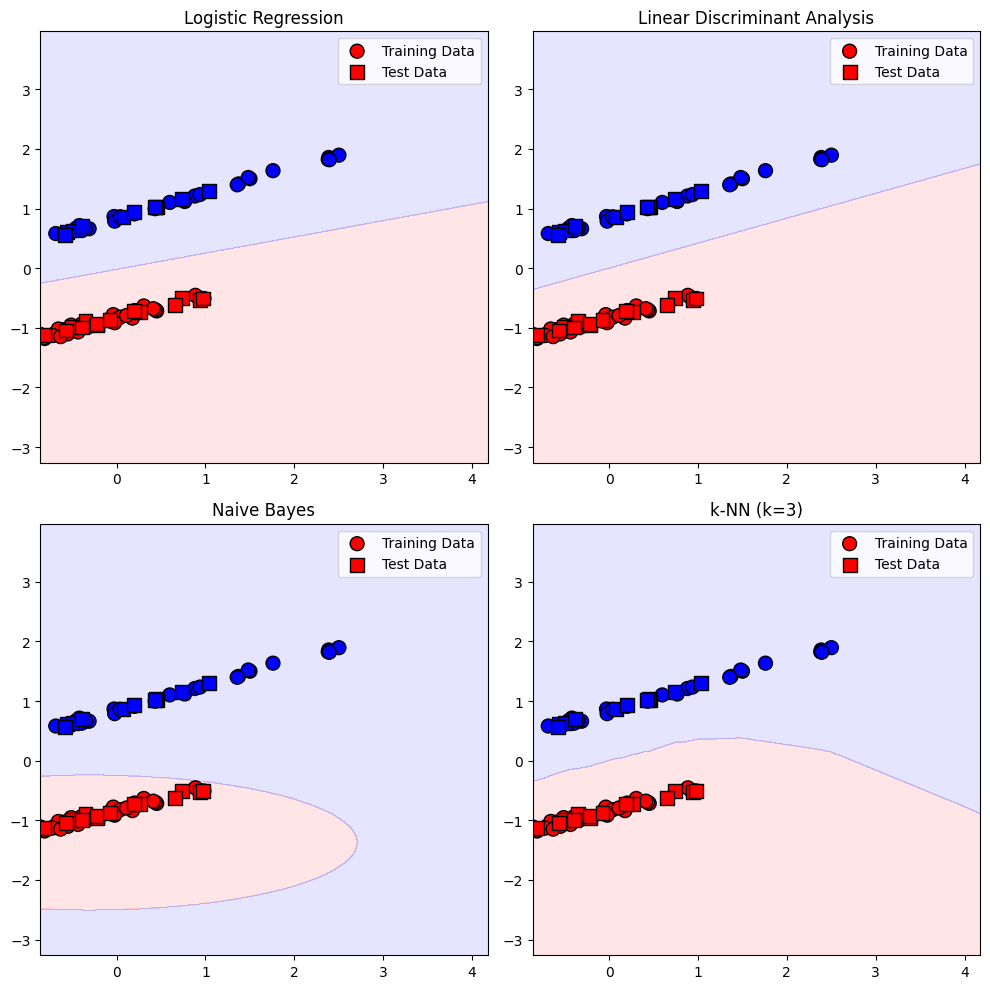

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

# Configuración de los gráficos
cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_points = ListedColormap(['#FF0000', '#0000FF'])

# Generar conjunto de datos sintético
X, y = datasets.make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, class_sep=1.5, random_state=42)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar los datos
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Crear los clasificadores
classifiers = [
    ("Logistic Regression", LogisticRegression(random_state=42)),
    ("Linear Discriminant Analysis", LinearDiscriminantAnalysis()),
    ("Naive Bayes", GaussianNB()),
    ("k-NN (k=3)", KNeighborsClassifier(n_neighbors=3))
]

# Crear gráficos para cada clasificador
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for ax, (name, clf) in zip(axs.ravel(), classifiers):
    # Ajustar el modelo
    clf.fit(X_train, y_train)

    # Crear una malla para visualizar la región de decisión
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predecir las etiquetas para cada punto en la malla
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Dibujar la región de decisión
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_background)

    # Dibujar los puntos de entrenamiento
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_points, edgecolors='k', marker='o', s=100, label='Training Data')

    # Dibujar los puntos de prueba
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_points, edgecolors='k', marker='s', s=100, label='Test Data')

    ax.set_xlim(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5)
    ax.set_ylim(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5)
    ax.set_title(name)
    ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Generar conjunto de datos sintético en 3D
X, y = datasets.make_classification(n_samples=100, n_features=3, n_redundant=0, n_informative=3,
                                     n_clusters_per_class=1, class_sep=2, random_state=42)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar los datos
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Crear gráficos 3D para cada clasificador
fig = plt.figure(figsize=(12, 9))
for i, (name, clf) in enumerate(classifiers, 1):
    ax = fig.add_subplot(2, 2, i, projection='3d')

    # Ajustar el modelo
    clf.fit(X_train, y_train)

    # Predecir las etiquetas para los datos de prueba
    y_pred = clf.predict(X_test)

    # Dibujar los puntos de entrenamiento
    ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train, cmap=cmap_points, edgecolors='k', marker='o', s=100, label='Training Data')

    # Dibujar los puntos de prueba, coloreados según la predicción del clasificador
    scatter = ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_pred, cmap=cmap_points, edgecolors='k', marker='s', s=100, label='Test Data')

    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3')
    ax.set_title(name)
    ax.legend()

# Añadir una barra de colores para indicar las clases
cbar = fig.colorbar(scatter, ax=axs, orientation='vertical', fraction=0.02, pad=0.1)
cbar.set_label('Class')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
try:
    # Cargamos todas las hojas del archivo Excel
    excel_file_path = 'BlueWinLose.xlsx'
    all_sheets = pd.read_excel(excel_file_path, sheet_name=None)
    # Mostraremos las primeras filas de cada hoja para entender la estructura de los datos
    sheet_overview = {sheet_name: data.head() for sheet_name, data in all_sheets.items()}
except Exception as e:
    sheet_overview = str(e)


In [ ]:
# Primero, calcularemos los promedios de 'blueGoldDiff' y 'blueExperienceDiff' solo para las partidas ganadas
# y luego definiremos umbrales para categorizar las partidas.
# Cargamos solo la hoja 'bluewin' que contiene las partidas ganadas por el equipo azul
bluewin_data = all_sheets['bluewin']

# Calculamos los promedios y desviaciones estándar de 'blueGoldDiff' y 'blueExperienceDiff'
gold_diff_mean = bluewin_data['blueGoldDiff'].mean()
gold_diff_std = bluewin_data['blueGoldDiff'].std()
exp_diff_mean = bluewin_data['blueExperienceDiff'].mean()
exp_diff_std = bluewin_data['blueExperienceDiff'].std()

# Establecemos los umbrales usando el promedio +/- una desviación estándar
# Esto es solo una propuesta inicial y puede ser ajustada según el criterio que se desee aplicar
thresholds = {
    'gold_diff': {
        'excelente': gold_diff_mean + gold_diff_std,
        'bueno': gold_diff_mean,
        'bien': gold_diff_mean - gold_diff_std
    },

    'exp_diff': {
        'excelente': exp_diff_mean + exp_diff_std,
        'bueno': exp_diff_mean,
        'bien': exp_diff_mean - exp_diff_std
    }
}

thresholds

In [ ]:
# Con los umbrales definidos, ahora podemos crear una nueva columna en la hoja 'bluewin' para etiquetar cada partida como 'excelente', 'bueno', o 'bien'.
# Usaremos los umbrales de 'blueGoldDiff' para categorizar las partidas.

# Función para etiquetar las partidas basado en la diferencia de oro
def categorize_match(gold_diff, exp_diff, thresholds):
    if gold_diff >= thresholds['gold_diff']['excelente'] or exp_diff >= thresholds['exp_diff']['excelente']:
        return 'excelente'
    elif gold_diff <= thresholds['gold_diff']['bien'] and exp_diff <= thresholds['exp_diff']['bien']:
        return 'bien'
    else:
        return 'bueno'

# Aplicamos la función para etiquetar las partidas
bluewin_data['performance_category'] = bluewin_data.apply(
    lambda row: categorize_match(row['blueGoldDiff'], row['blueExperienceDiff'], thresholds), axis=1
)

# Ahora tenemos una columna 'performance_category' con la clasificación de rendimiento de cada partida ganada
# Mostramos cómo quedaron categorizadas algunas de las partidas
performance_categories = bluewin_data[['blueGoldDiff', 'blueExperienceDiff', 'performance_category']].head(10)
performance_categories

In [ ]:
# Procederemos a aplicar los cuatro métodos de clasificación al conjunto de datos etiquetado.
# Primero, dividiremos los datos en conjuntos de entrenamiento y prueba.
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder


# Preparamos los datos
X = bluewin_data[['blueGoldDiff', 'blueExperienceDiff']]
y = bluewin_data['performance_category']

# Codificamos las etiquetas de categoría de rendimiento
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=0)

# Inicializamos los modelos
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'LDA': LinearDiscriminantAnalysis(),
    'Naive Bayes': GaussianNB(),
    'k-NN': KNeighborsClassifier(n_neighbors=5)
}

# Entrenamos cada modelo y evaluamos su desempeño
results = {}

for model_name, model in models.items():
    # Entrenamiento del modelo
    model.fit(X_train, y_train)
    # Predicción en el conjunto de prueba
    y_pred = model.predict(X_test)
    # Evaluación del modelo
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
    # Almacenamiento de los resultados
    results[model_name] = {
        'Model': model,
        'Accuracy': accuracy,
        'Report': report
    }

# Mostramos los resultados de precisión para cada modelo
for model_name, result in results.items():
    print(f"{model_name} Accuracy: {result['Accuracy']:.2f}")
    print(result['Report'])
    print("--------------------------------------------------\n")


In [ ]:
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# Aplicamos PCA para reducir a dos dimensiones, aunque creo que no es necesario......
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)

# esta parte mejor no la toquen
# print(X_r)
# print(X)

# Dividimos los datos proyectados en conjuntos de entrenamiento y prueba
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_r, y_encoded, test_size=0.2, random_state=0)

# Función para visualizar los límites de decisión en 2D
# Ajustamos la función para usar un rango más pequeño y un paso más grande para la malla
def plot_decision_boundaries_very_low_res(X, y, model, title):
    model.fit(X, y)
    # Definimos rangos para graficar con un paso más grande para reducir el rango de la malla
    x_min, x_max = np.percentile(X[:, 0], [2, 98])
    y_min, y_max = np.percentile(X[:, 1], [2, 98])
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Predecimos las clases para cada punto en la malla
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Creamos mapa de colores
    colors = ('red', 'blue', 'lightgreen')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # Dibujamos la malla de decision
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    # Graficamos los puntos de datos
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker='+', label=f'Clase {cl}')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='upper left')
    plt.title(title)

# Visualizamos los límites de decisión para cada modelo en los datos reducidos a 2D con muy baja resolución
plt.figure(figsize=(20, 10))

# Regresión Logística
plt.subplot(2, 2, 1)
plot_decision_boundaries_very_low_res(X_train_r, y_train_r, LogisticRegression(max_iter=1000), "Regresión Logística")

# LDA
plt.subplot(2, 2, 2)
plot_decision_boundaries_very_low_res(X_train_r, y_train_r, LinearDiscriminantAnalysis(), "LDA")

# Naive Bayes
plt.subplot(2, 2, 3)
plot_decision_boundaries_very_low_res(X_train_r, y_train_r, GaussianNB(), "Naive Bayes")

# k-NN
plt.subplot(2, 2, 4)
plot_decision_boundaries_very_low_res(X_train_r, y_train_r, KNeighborsClassifier(n_neighbors=5), "k-NN")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score

# Calculamos nuevamente las métricas de evaluación para el modelo de Regresión Logística
logistic_f1 = f1_score(y_test_r, y_pred_logistic, average='weighted')
logistic_cm = confusion_matrix(y_test_r, y_pred_logistic)
logistic_roc_auc = roc_auc_score(y_test_r, logistic_model.predict_proba(X_test_r), multi_class='ovr')

# Mostramos las métricas corregidas
logistic_metrics_corrected = {
    'Accuracy': logistic_accuracy,
    'F1 Score': logistic_f1,
    'Confusion Matrix': logistic_cm,
    'ROC AUC': logistic_roc_auc
}



logistic_metrics_corrected

In [ ]:
## Visualizamos los límites de decisión para Regresión Logística en los datos reducidos a 2D
plt.figure(figsize=(10, 8))
plot_decision_boundaries_very_low_res(X_train_r, y_train_r, LogisticRegression(max_iter=1000), "Regresión Logística")
plt.show()

# Además, calculamos las métricas para el modelo de Regresión Logística
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_r, y_train_r)
y_pred_logistic = logistic_model.predict(X_test_r)

# Calculamos las métricas de evaluación
logistic_accuracy = accuracy_score(y_test_r, y_pred_logistic)
logistic_f1 = f1_score(y_test_r, y_pred_logistic, average='weighted')
logistic_cm = confusion_matrix(y_test_r, y_pred_logistic)
logistic_roc_auc = roc_auc_score(y_test_r, logistic_model.predict_proba(X_test_r), multi_class='ovr')

# Mostramos las métricas
logistic_metrics = {
    'Accuracy': logistic_accuracy,
    'F1 Score': logistic_f1,
    'Confusion Matrix': logistic_cm,
    'ROC AUC': logistic_roc_auc
}



logistic_metrics

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Visualizamos los límites de decisión para LDA en los datos reducidos a 2D
plt.figure(figsize=(10, 8))
plot_decision_boundaries_very_low_res(X_train_r, y_train_r, LinearDiscriminantAnalysis(), "LDA")
plt.show()


# Entrenamos y calculamos las métricas para el modelo de LDA
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_r, y_train_r)
y_pred_lda = lda_model.predict(X_test_r)

# Calculamos las métricas de evaluación para LDA
lda_accuracy = accuracy_score(y_test_r, y_pred_lda)
lda_f1 = f1_score(y_test_r, y_pred_lda, average='weighted')
lda_cm = confusion_matrix(y_test_r, y_pred_lda)
lda_roc_auc = roc_auc_score(y_test_r, lda_model.predict_proba(X_test_r), multi_class='ovr')

# Mostramos las métricas para LDA
lda_metrics = {
    'Accuracy': lda_accuracy,
    'F1 Score': lda_f1,
    'Confusion Matrix': lda_cm,
    'ROC AUC': lda_roc_auc
}

lda_metrics

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Visualizamos los límites de decisión para Naive Bayes en los datos reducidos a 2D
plt.figure(figsize=(10, 8))
plot_decision_boundaries_very_low_res(X_train_r, y_train_r, GaussianNB(), "Naive Bayes")
plt.show()

# Entrenamos y calculamos las métricas para el modelo Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_r, y_train_r)
y_pred_nb = nb_model.predict(X_test_r)

# Calculamos las métricas de evaluación para Naive Bayes
nb_accuracy = accuracy_score(y_test_r, y_pred_nb)
nb_f1 = f1_score(y_test_r, y_pred_nb, average='weighted')
nb_cm = confusion_matrix(y_test_r, y_pred_nb)
nb_roc_auc = roc_auc_score(y_test_r, nb_model.predict_proba(X_test_r), multi_class='ovr')

# Mostramos las métricas para Naive Bayes
nb_metrics = {
    'Accuracy': nb_accuracy,
    'F1 Score': nb_f1,
    'Confusion Matrix': nb_cm,
    'ROC AUC': nb_roc_auc
}

nb_metrics


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Visualizamos los límites de decisión para k-NN en los datos reducidos a 2D
plt.figure(figsize=(10, 8))
plot_decision_boundaries_very_low_res(X_train_r, y_train_r, KNeighborsClassifier(n_neighbors=5), "k-NN")
plt.show()

# Entrenamos y calculamos las métricas para el modelo k-NN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_r, y_train_r)
y_pred_knn = knn_model.predict(X_test_r)

# Calculamos las métricas de evaluación para k-NN
knn_accuracy = accuracy_score(y_test_r, y_pred_knn)
knn_f1 = f1_score(y_test_r, y_pred_knn, average='weighted')
knn_cm = confusion_matrix(y_test_r, y_pred_knn)
knn_roc_auc = roc_auc_score(y_test_r, knn_model.predict_proba(X_test_r), multi_class='ovr')

# Mostramos las métricas para k-NN
knn_metrics = {
    'Accuracy': knn_accuracy,
    'F1 Score': knn_f1,
    'Confusion Matrix': knn_cm,
    'ROC AUC': knn_roc_auc
}

knn_metrics
